***KNOWN***

// columns

- id: unique oil well identifier
- f0, f1, f2: features of points, specific meaning unimportant, but they are significant
- product: volume of reserves in the oil well (thousand barrels)

// conditions

- Linear Regression only!
- budget for development of 200 oil wells is 100 USD million
- one barrel brings 4.5 USD of revenue, revenue from one unit is 4,500 USD (volumne of reserves is in thousand barrels)
- keep only regions with risk of losses lower than 2.5%, then the region with highest mean profit should be selected

// features & target

- Indentifier column to be excluded from training: ['id']
- Features: ['f0', 'f1', 'f2']
- Target: ['product']

***UNKNOWN***

- hyperparameters?
- ?

***OBJECTIVES***

*1. Download and prepare data, explain*

- check for duplicates
- check dtypes
- remove 'id' identifier from features
- scale features
- box plot to observe historical 'product' distributions, maybe useful

*2. Train and test model for each region*

- 3:1 split for training:validation
- save predictions and correct answers for validation set
- print average predicted reserves and model RMSE
- analyze

*3. Prepare profit calculation*
- store values for calculations in seperate variables
- calculate volume of reserves sufficient for developing a new well without losses, compare obtained value
with the average volume of reserves in each region
- present findings

*4. Write function to calculate profit from set of wells and model predictions*

- pick wells with highest prediction values
- summarize target volume of reserves in accordance with predictions
- present findings: suggest a region and justify the choice, calculate profit for obtained reserves value

*5. Calculate risks and profit for each region*

- use bootstrapping with 1000 samples to find distribution of profit
- find average profit, 95% confidence interval, loss is negative profit, calculate as probability expressed as percentage
- present findings, suggest region for oil well development, justify choice

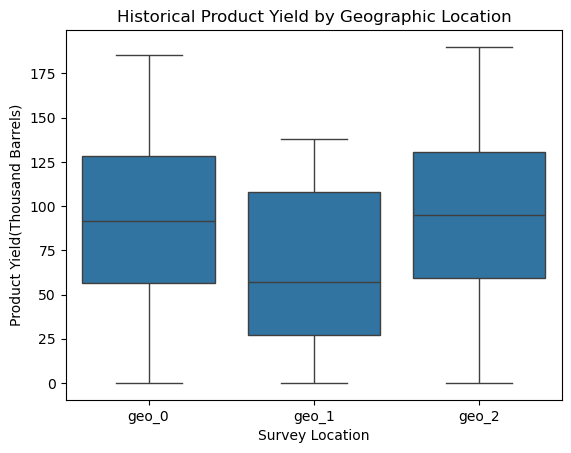

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

geo_0 = pd.read_csv('geo_data_0.csv')
geo_1 = pd.read_csv('geo_data_1.csv')
geo_2 = pd.read_csv('geo_data_2.csv')

#print(geo_0.duplicated().value_counts())
#print(geo_1.duplicated().value_counts())
#print(geo_2.duplicated().value_counts())

#print(geo_0.info())
#print(geo_1.info())
#print(geo_2.info())

#display(geo_0.sample(10, random_state=12345))
#display(geo_1.sample(10, random_state=12345))
#display(geo_2.sample(10, random_state=12345))

#display(geo_0[geo_0['id'].duplicated(keep=False)].sort_values(by=['id']))
#display(geo_1[geo_1['id'].duplicated(keep=False)].sort_values(by=['id']))
#display(geo_2[geo_2['id'].duplicated(keep=False)].sort_values(by=['id']))

historical_product = pd.DataFrame({'geo_0': geo_0['product'], 'geo_1': geo_1['product'], 'geo_2': geo_2['product']})
historical_product = historical_product.melt(var_name='geo_n', value_name='product')
#display(historical_product.info())
#display(historical_product.sample(10, random_state=12345))


sns.boxplot(data=historical_product, x='geo_n', y='product')
plt.title('Historical Product Yield by Geographic Location')
plt.xlabel('Survey Location')
plt.ylabel('Product Yield(Thousand Barrels)')
plt.show()

**geo_0: 10 locations ('id') have two entries each**

**geo_1: 4 locations ('id') have two entries each**

**geo_2: 4 locations ('id') have two entries each**

**All columns across all 3 datasets have the appropriate dtype (float64), no missing values, and the identifier ('id') will be removed before training.**

**The locations that have duplicate entries have different features and target values. We are developing one well per location, and the best measurement for these locations represents their true potential. With this in mind we can continue with feature preparation and splitting.**